In [1]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import keras

2023-04-27 21:46:41.382289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_path = './archive/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.7, 1),
    )
    
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(256, 256),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [3]:
filename="CNN 140k Pass_1/CNN140k"

model = keras.models.load_model("/home/BE_Darshan/test/models/"+filename+".h5")

2023-04-27 21:47:08.059756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 21:47:08.077641: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 1509s 75ms/step


In [5]:
y_pred= [int(np.argmax(element)) for element in y_pred]

In [6]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred))

ROC AUC Score: 0.9377500000000001
AP Score: 0.9165692767976892

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10000
           1       0.95      0.92      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [7]:
scores1 = model.evaluate(test_flow)

/home/BE_Darshan/anaconda3/envs/darshan/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 9400/20000 [=============>................] - ETA: 12:58 - loss: 0.1312 - accuracy: 0.9526

KeyboardInterrupt: 

In [ ]:
test_flow[10002][0][0].shape

(256, 256, 3)

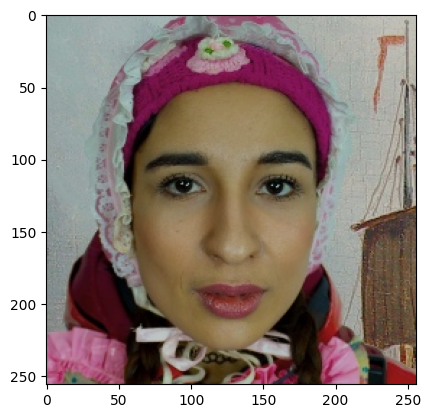

In [ ]:
plt.imshow(test_flow[10001][0][0])

In [ ]:
y_pred[10001]

1

In [ ]:
test_flow[9000][1][0]

0.0

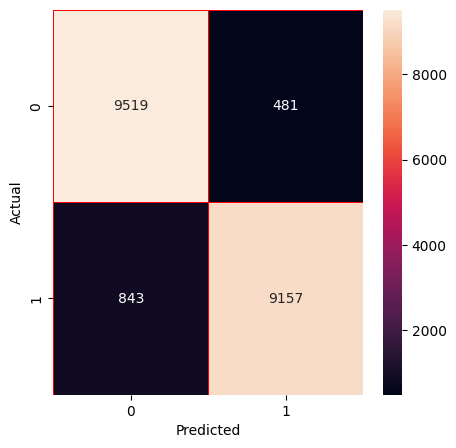

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()